In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
data = pd.read_csv('badminton_dataset.csv')



In [6]:
data

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No
5,Sunny,Mild,High,Strong,No
6,Rain,Cool,Normal,Strong,No
7,Rain,Cool,High,Strong,No
8,Sunny,Hot,High,Strong,No
9,Sunny,Hot,Normal,Strong,No


In [7]:
data.info

<bound method DataFrame.info of      Outlook Temperature Humidity    Wind Play_Badminton
0   Overcast        Cool     High    Weak            Yes
1      Sunny        Mild   Normal  Strong             No
2       Rain        Mild   Normal  Strong             No
3      Sunny        Cool     High    Weak            Yes
4      Sunny        Cool     High  Strong             No
5      Sunny        Mild     High  Strong             No
6       Rain        Cool   Normal  Strong             No
7       Rain        Cool     High  Strong             No
8      Sunny         Hot     High  Strong             No
9      Sunny         Hot   Normal  Strong             No
10  Overcast        Mild     High  Strong             No
11  Overcast         Hot     High  Strong             No
12     Sunny        Mild     High    Weak            Yes
13  Overcast         Hot   Normal  Strong             No
14     Sunny         Hot   Normal    Weak            Yes
15  Overcast        Cool   Normal  Strong             No

In [9]:
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = data.drop(columns='Play_Badminton')
y = data['Play_Badminton']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and MSE for each model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Visualize the results

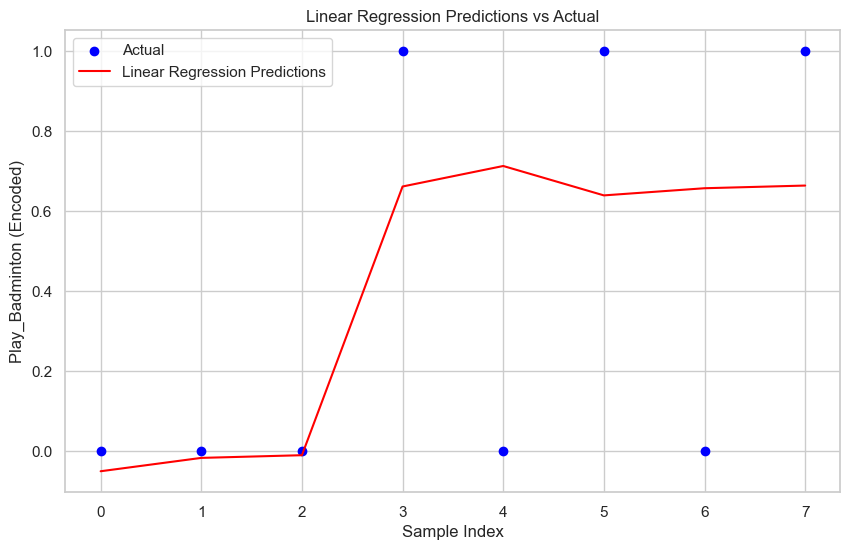

(1.0, 0.875, np.float64(0.1625919391467374))

In [10]:
sns.set(style="whitegrid")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred_linear, color='red', linestyle='-', label='Linear Regression Predictions')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

accuracy_tree, accuracy_knn, mse_linear

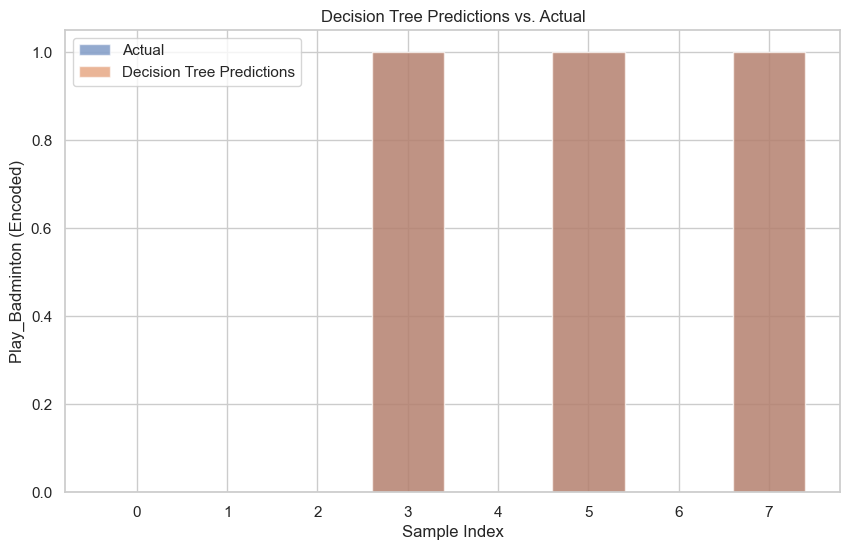

In [11]:
# 1. Decision Tree Predictions vs. Actual
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.6, label='Actual')
plt.bar(range(len(y_test)), y_pred_tree, alpha=0.6, label='Decision Tree Predictions')
plt.title('Decision Tree Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

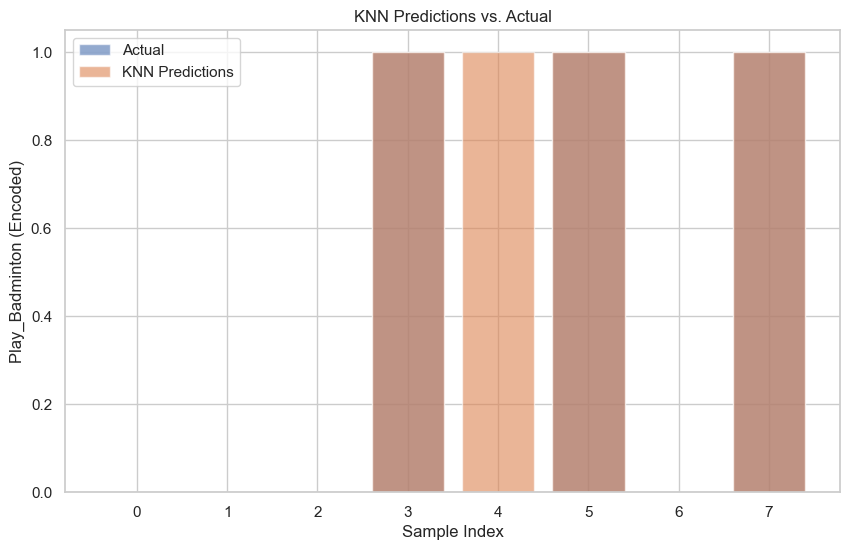

In [12]:
# 2. KNN Predictions vs. Actual
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, alpha=0.6, label='Actual')
plt.bar(range(len(y_test)), y_pred_knn, alpha=0.6, label='KNN Predictions')
plt.title('KNN Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

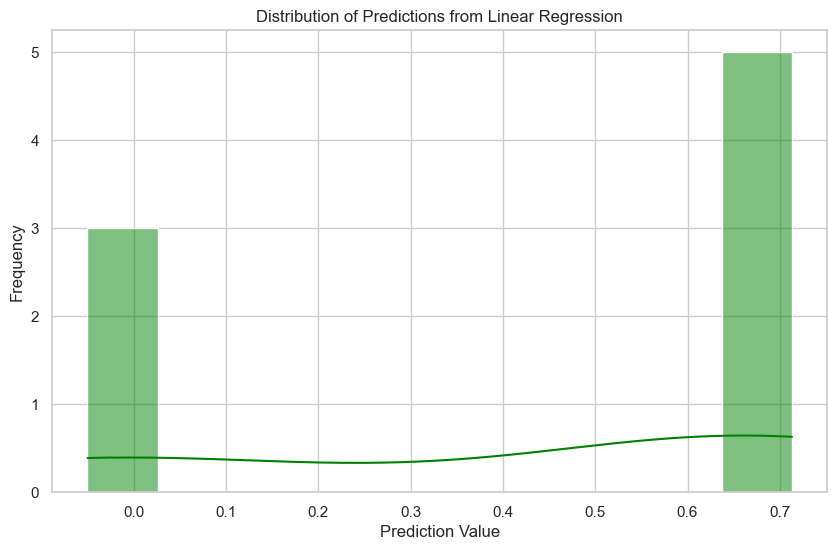

In [13]:
# 3. Distribution of Predictions from Linear Regression
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_linear, kde=True, color='green', bins=10)
plt.title('Distribution of Predictions from Linear Regression')
plt.xlabel('Prediction Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\msi1\AppData\Local\Temp\ipykernel_32488\835628554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette='viridis')


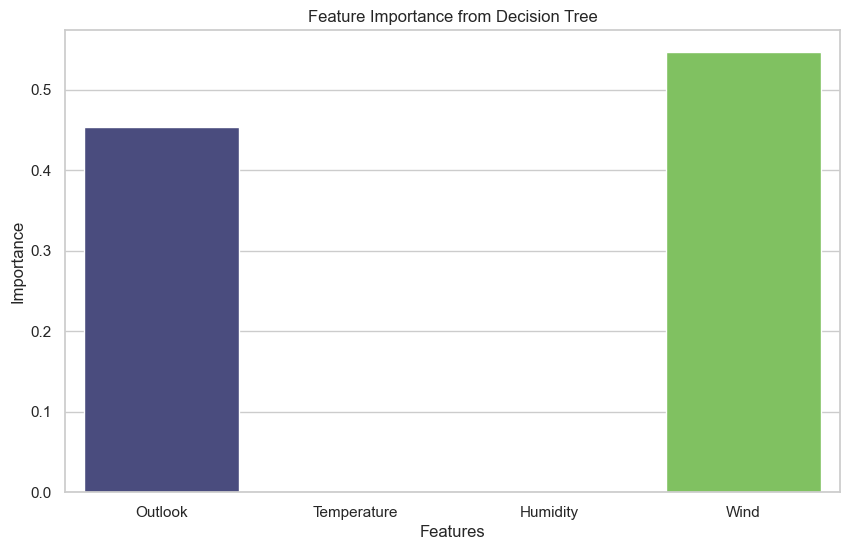

In [14]:
# 4. Feature Importance from Decision Tree
plt.figure(figsize=(10, 6))
feature_importances = decision_tree.feature_importances_
sns.barplot(x=X.columns, y=feature_importances, palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

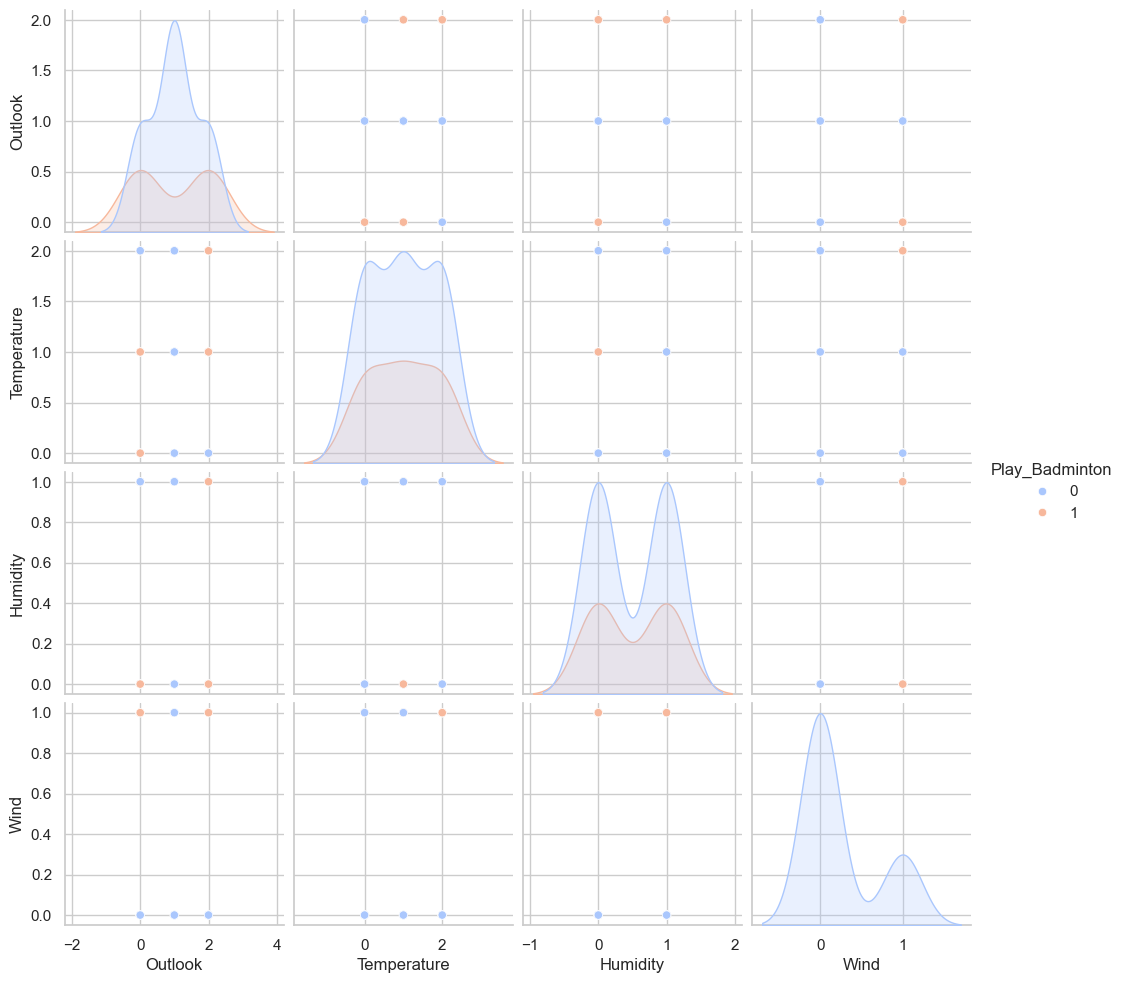

In [15]:
# 5. Pairplot of Features
sns.pairplot(data, hue='Play_Badminton', palette='coolwarm')
plt.show()

In [16]:
accuracy_tree, accuracy_knn, mse_linear

(1.0, 0.875, np.float64(0.1625919391467374))